In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from Model import NNRegressor

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

2023-10-28 16:16:41.617369: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-28 16:16:41.650307: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-28 16:16:41.650345: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-28 16:16:41.650381: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-28 16:16:41.657618: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-28 16:16:41.658472: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

In [2]:
data = pd.data = (
    pd.read_csv('../data/energydata_complete.csv')
    .drop(['date', 'rv1', 'rv2'], axis=1)
    .assign(target = lambda k: k.lights + k.Appliances)
    .drop(['lights', 'Appliances'], axis=1)
)

In [3]:
### Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop('target', axis=1),
    data.target,
    test_size=0.2,
    random_state=42
)

In [4]:
# Scale data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
model = NNRegressor(activation="tanh", input_shape=400)

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=5e-3),
     loss='mse',
    # metrics=['mse']
)

In [20]:
history = model.fit(
    X_train, y_train,
    epochs=400,
    validation_data=(X_test, y_test),
    use_multiprocessing=True,
    # callbacks = [es, mc]
)



Epoch 1/400


494/494 [==============================] - 1s 1ms/step - loss: 11032.6445 - val_loss: 9164.7031
Epoch 2/400
494/494 [==============================] - 1s 1ms/step - loss: 9381.1846 - val_loss: 8755.3818
Epoch 3/400
494/494 [==============================] - 1s 1ms/step - loss: 9089.6221 - val_loss: 8750.8232
Epoch 4/400
494/494 [==============================] - 1s 1ms/step - loss: 8830.7705 - val_loss: 8449.6904
Epoch 5/400
494/494 [==============================] - 1s 1ms/step - loss: 8666.0400 - val_loss: 8266.5049
Epoch 6/400
494/494 [==============================] - 1s 1ms/step - loss: 8485.7812 - val_loss: 8143.8057
Epoch 7/400
494/494 [==============================] - 1s 1ms/step - loss: 8312.5742 - val_loss: 8024.0796
Epoch 8/400
494/494 [==============================] - 1s 1ms/step - loss: 8154.5493 - val_loss: 7900.4927
Epoch 9/400
494/494 [==============================] - 1s 1ms/step - loss: 7981.0376 - val_loss: 7887.6631
Epoch 10/400
494/494 [==========================

In [13]:
np.sqrt(5602)

74.84650960465692

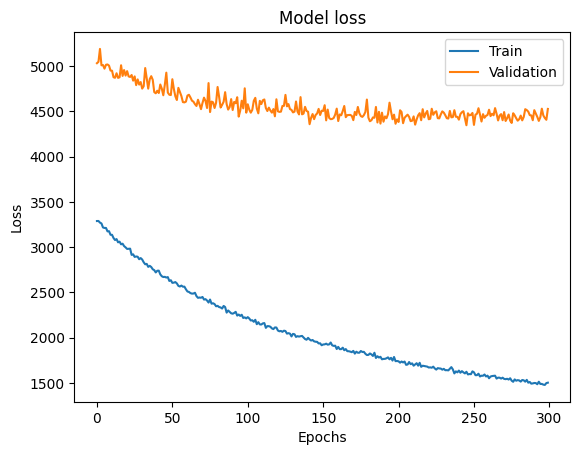

In [21]:
### Plot training and validation loss
plt.plot(history.history['loss'][100:])
plt.plot(history.history['val_loss'][100:])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()